In [41]:
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns



In [42]:
df = pd.read_csv("C:/Users/usuario/Desktop/Data Science/Projeto AML/data/01_raw/synthetic_dataset.csv")

print(df.head())

   transaction_id     transaction_time  transaction_amount  sender_id  \
0               0  2025-11-19 01:00:01            12582.87  acc914603   
1         1000000  2025-11-19 05:20:01            12144.62  acc797675   
2               1  2025-11-15 02:15:31              431.55  acc941785   
3               2  2025-11-03 06:03:08             9575.45  acc061533   
4         1000002  2025-11-03 11:35:08             9267.83  acc936339   

             name             cpf receiver_id     receiver_name  \
0  Zoe Cavalcante  803.274.965-92   acc797675       Bianca Lima   
1     Bianca Lima  753.842.196-37   acc517182      Eloah Santos   
2   Vinicius Melo  702.146.589-02   acc753424  Enzo Casa Grande   
3     Ian Correia  317.826.459-00   acc936339         Mariah Sa   
4       Mariah Sa  578.463.921-82   acc265016     Miguel Barros   

  transaction_type    transaction_city  ... device_id device_model  \
0              pix               Ramos  ...      dv46         md31   
1              pix

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11492 entries, 0 to 11491
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      11492 non-null  int64  
 1   transaction_time    11492 non-null  object 
 2   transaction_amount  11492 non-null  float64
 3   sender_id           11492 non-null  object 
 4   name                11492 non-null  object 
 5   cpf                 11492 non-null  object 
 6   receiver_id         11492 non-null  object 
 7   receiver_name       11492 non-null  object 
 8   transaction_type    11492 non-null  object 
 9   transaction_city    11492 non-null  object 
 10  birth_date          11492 non-null  object 
 11  address_pcode       11492 non-null  object 
 12  phone_number        11492 non-null  object 
 13  acc_creation_date   11492 non-null  object 
 14  agency              11492 non-null  int64  
 15  account             11492 non-null  int64  
 16  cred

In [44]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

df['birth_date'] = pd.to_datetime(df['birth_date'])

df['acc_creation_date'] = pd.to_datetime(df['acc_creation_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11492 entries, 0 to 11491
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      11492 non-null  int64         
 1   transaction_time    11492 non-null  datetime64[ns]
 2   transaction_amount  11492 non-null  float64       
 3   sender_id           11492 non-null  object        
 4   name                11492 non-null  object        
 5   cpf                 11492 non-null  object        
 6   receiver_id         11492 non-null  object        
 7   receiver_name       11492 non-null  object        
 8   transaction_type    11492 non-null  object        
 9   transaction_city    11492 non-null  object        
 10  birth_date          11492 non-null  datetime64[ns]
 11  address_pcode       11492 non-null  object        
 12  phone_number        11492 non-null  object        
 13  acc_creation_date   11492 non-null  datetime64

In [45]:
df['sender_age'] = ((df['transaction_time'] - df['birth_date']).dt.days/365).astype(int)

df['transaction_hour'] = df['transaction_time'].dt.hour

df['large_amt'] = df['transaction_amount'] > 10000

df['acc_age_days'] = (df['transaction_time'] - df['acc_creation_date']).dt.days

print(df.head())

   transaction_id    transaction_time  transaction_amount  sender_id  \
0               0 2025-11-19 01:00:01            12582.87  acc914603   
1         1000000 2025-11-19 05:20:01            12144.62  acc797675   
2               1 2025-11-15 02:15:31              431.55  acc941785   
3               2 2025-11-03 06:03:08             9575.45  acc061533   
4         1000002 2025-11-03 11:35:08             9267.83  acc936339   

             name             cpf receiver_id     receiver_name  \
0  Zoe Cavalcante  803.274.965-92   acc797675       Bianca Lima   
1     Bianca Lima  753.842.196-37   acc517182      Eloah Santos   
2   Vinicius Melo  702.146.589-02   acc753424  Enzo Casa Grande   
3     Ian Correia  317.826.459-00   acc936339         Mariah Sa   
4       Mariah Sa  578.463.921-82   acc265016     Miguel Barros   

  transaction_type    transaction_city  ... receiver_account gender  \
0              pix               Ramos  ...           923427      f   
1              pix    

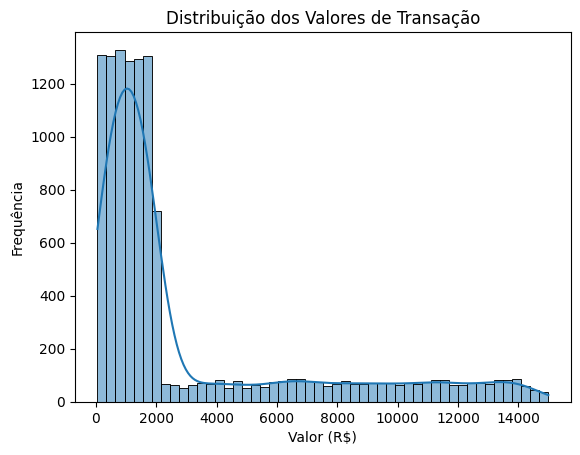

In [46]:
sns.histplot(df['transaction_amount'], bins=50, kde=True)
plt.title('Distribuição dos Valores de Transação')
plt.xlabel('Valor (R$)')
plt.ylabel('Frequência')
plt.show()

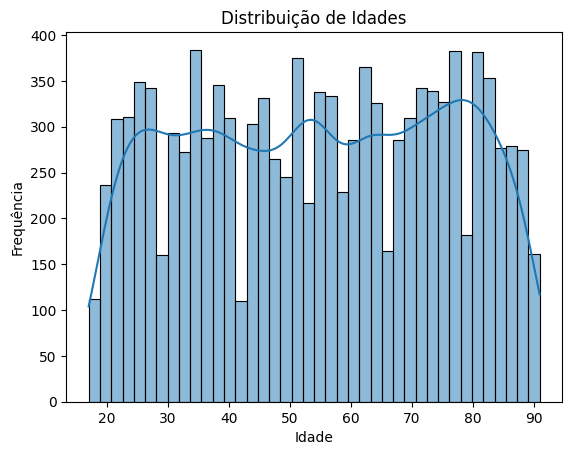

In [47]:
sns.histplot(df['sender_age'], bins=40, kde=True)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')
plt.show()

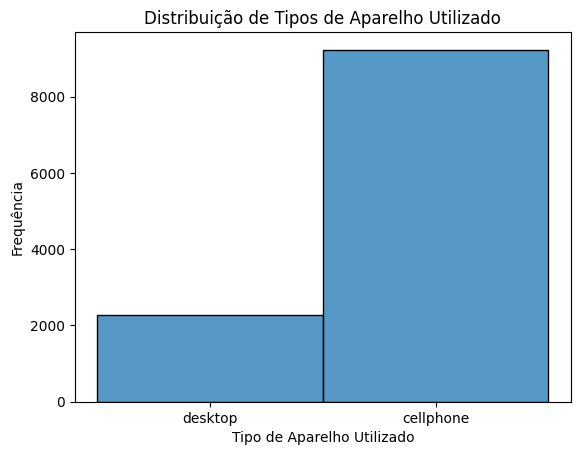

In [48]:
sns.histplot(df['device'], bins=3)
plt.xlabel('Tipo de Aparelho Utilizado')
plt.ylabel('Frequência')
plt.title('Distribuição de Tipos de Aparelho Utilizado')
plt.show()

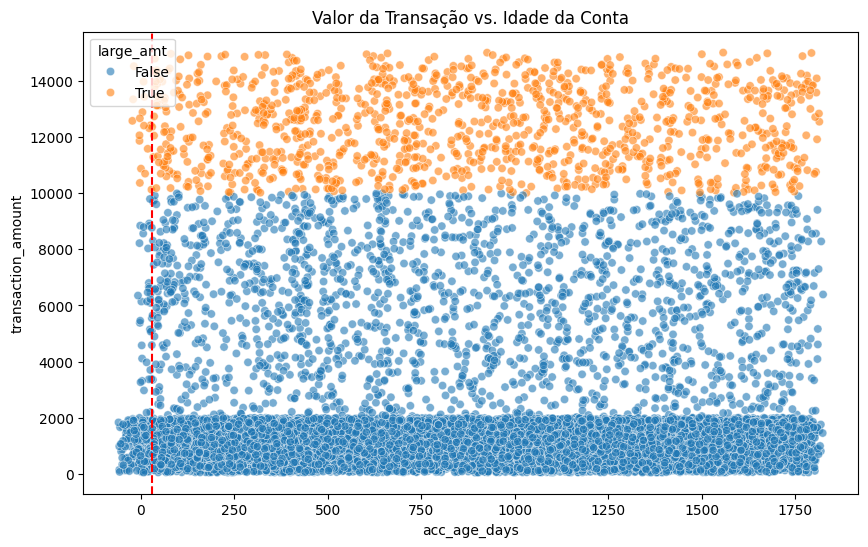

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acc_age_days', y='transaction_amount', hue='large_amt', alpha=0.6)
plt.title('Valor da Transação vs. Idade da Conta')
plt.axvline(x=30, color='red', linestyle='--') # Marca de 30 dias
plt.show()

Análise de grafos

In [50]:
G = nx.from_pandas_edgelist(
    df,
    source='sender_id',    # Origem da seta
    target='receiver_id',   # Ponta da seta
    edge_attr=['transaction_amount', 'acc_age_days'],    # Dados para 'pendurar' na aresta
    create_using=nx.MultiDiGraph()       # Permite multiplas arestas entre os nós
)

In [51]:
total_received = df.groupby('receiver_id')['transaction_amount'].sum()
total_sent = df.groupby('sender_id')['transaction_amount'].sum()

In [52]:
in_degree = dict(G.in_degree())
sus_id = [node for node, degree in in_degree.items() if degree > 10]
print(f"{len(sus_id)} contas recebem de muita gente")

93 contas recebem de muita gente


In [53]:
for conta_id in sus_id:
    in_degree = G.in_degree(conta_id)

    out_degree = G.out_degree(conta_id)

    if in_degree >=10 and out_degree > 0 and out_degree <= 3:
        print(f"Conta {conta_id} recebe de {in_degree} contas e envia para apenas {out_degree} contas")

Conta acc161849 recebe de 11 contas e envia para apenas 3 contas


In [54]:
metrics_list = []

for sus in sus_id:
    amt_in = total_received.get(sus, 0)
    amt_out = total_sent.get(sus, 0)

    if amt_in > 0:
        ratio = amt_out / amt_in

    else:
        ratio = 0

    if 0.8 <= ratio <= 1.05:
        metrics_list.append({
            'account_id': sus,
            'total_in': amt_in,
            'total_out': amt_out,
            'ratio': ratio,
            'type': 'Suspeita de Laranja'
        })
    elif ratio > 1.05:
        pass

suspects_df = pd.DataFrame(metrics_list)

if not suspects_df.empty:
    print(suspects_df.sort_values('ratio', ascending=False).head(10))

   account_id   total_in  total_out     ratio                 type
8   acc842339  130703.03  127050.09  0.972052  Suspeita de Laranja
3   acc702604   99980.36   97143.76  0.971628  Suspeita de Laranja
26  acc289332  112917.13  109533.50  0.970034  Suspeita de Laranja
40  acc088870  103946.00  100777.46  0.969517  Suspeita de Laranja
29  acc089646  103591.54  100415.45  0.969340  Suspeita de Laranja
37  acc319419  119618.68  115866.82  0.968635  Suspeita de Laranja
33  acc644180  103488.06  100234.86  0.968564  Suspeita de Laranja
61  acc746011  173661.67  168112.35  0.968045  Suspeita de Laranja
51  acc755230  118201.78  114414.86  0.967962  Suspeita de Laranja
30  acc348202  156528.58  151496.34  0.967851  Suspeita de Laranja


In [55]:
# Agrupando por conta para saber a 'velocidade' média do dinheiro
avg_in_time = df.groupby('receiver_id')['transaction_time'].mean()
avg_out_time = df.groupby('sender_id')['transaction_time'].mean()

# DataFrame auxiliar
time_features = pd.DataFrame(index=df['sender_id'].unique())
time_features.index.name = 'account_id'

# Calculando a diferença em HORAS
# avg_retention_hours negativo = enviou antes de receber (dinheiro parado/antigo)
# avg_retention_hours positivo e pequeno = o dinheiro 'queima' na mão.
time_features['avg_retention_hours'] = (avg_out_time - avg_in_time).dt.total_seconds() / 3600

# Preencher NaN quem só recebeu ou só enviou com um valor alto
time_features['avg_retention_hours'] = time_features['avg_retention_hours'].fillna(9999)

print(time_features.head())

            avg_retention_hours
account_id                     
acc914603            158.397037
acc797675              4.116667
acc941785            209.185301
acc061533            -46.358833
acc936339              3.937879


In [56]:
# Criar DataFrame base com todos os nós

# Métricas de Grafos
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Métricas Financeiras
total_in = df.groupby('receiver_id')['transaction_amount'].sum()
total_out = df.groupby('sender_id')['transaction_amount'].sum()

# Montar o DataFrame Mestre com todos os nós
all_nodes = list(G.nodes())
metrics_df = pd.DataFrame(index=all_nodes)
metrics_df.index.name = 'account_id'

metrics_df['in_degree'] = metrics_df.index.map(in_degree).fillna(0)
metrics_df['out_degree'] = metrics_df.index.map(out_degree).fillna(0)
metrics_df['total_in'] = total_in
metrics_df['total_out'] = total_out

metrics_df = metrics_df.join(time_features['avg_retention_hours'])

# Calcular Ratio
metrics_df['ratio'] = metrics_df['total_out'] / (metrics_df['total_in'] + 0.01)

# Preencher vazios
metrics_df = metrics_df.fillna(0)

print(f"Dataset pronto para ML com {len(metrics_df)} contas.")

Dataset pronto para ML com 2999 contas.


In [57]:
# Definindo suspeitos
metrics_df['is_suspect'] = 0

suspect = (
    (metrics_df['in_degree'] > 5) &                   # Recebe de vários
    (metrics_df['ratio'].between(0.8, 1.05)) &        # Repassa quase tudo
    (metrics_df['avg_retention_hours'] < 12) &        # Repassa muito rápido (12h)
    (metrics_df['total_in'] > 10000)                  # Valores altos
)

metrics_df.loc[suspect, 'is_suspect'] = 1

print(metrics_df['is_suspect'].value_counts())

is_suspect
0    2860
1     139
Name: count, dtype: int64


In [58]:
print(metrics_df.head())

            in_degree  out_degree   total_in  total_out  avg_retention_hours  \
account_id                                                                     
acc914603           2           6    2147.89   23641.66           158.397037   
acc797675          13          13  110133.66  106443.47             4.116667   
acc517182          53           0  455653.39       0.00             0.000000   
acc941785           6           4    6091.58    4115.81           209.185301   
acc753424           4           5    3302.46    5789.44          -249.423903   

                ratio  is_suspect  
account_id                         
acc914603   11.006872           0  
acc797675    0.966493           1  
acc517182    0.000000           0  
acc941785    0.675654           0  
acc753424    1.753064           0  


In [59]:
# Converte para um arquivo compacto que será usado na modelagem


metrics_df.to_parquet('C:/Users/usuario/Desktop/Data Science/Projeto AML/data/01_raw/metrics_df.parquet')